# **Simulazione M2AC Pink Noise**


## **Solar Penalty and Comfort Reward**

----

In [1]:
# Forza l'ambiente corretto per CityLearn e Hydra su Colab
!pip uninstall -y numpy tensorboard tensorflow
!pip install numpy==1.23.5
!pip install tensorflow==2.12.0
!pip install tensorboard==2.12.3
!pip install hydra-core
!pip install citylearn
!pip install omegaconf
!pip install colorednoise
!pip install mujoco

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: tensorboard 2.18.0
Uninstalling tensorboard-2.18.0:
  Successfully uninstalled tensorboard-2.18.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 120.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not installed.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 38.7 MB/s eta 0:00:0

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Lista degli import**

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/src')

from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import *
from citylearn.wrappers import *
from utils import plotting_functions as plt
#import per strutture dati
import pandas as pd
from datetime import datetime

#import per grafici
from IPython.display import display, Markdown

#import per l'utilizzo degli agenti model based
# Inizializza Hydra in modalità programmatica
from hydra import initialize, compose
import numpy as np
import omegaconf
import torch

import sys, os, shutil

os.chdir('/content/drive/MyDrive/Colab Notebooks/src/agents/model_based')





import importlib
import agents.model_based.mbrl.algorithms.m2ac as m2ac
importlib.reload(m2ac)
import agents.model_based.mbrl.util.env as env_util

In [3]:
def run(cfg: omegaconf.DictConfig, test_cfg: omegaconf.DictConfig = None):

    print(f"Using the following algorithm: {cfg.algorithm.name}!")
    env, term_fn, reward_fn = env_util.EnvHandler.make_env(cfg, test_env=False)
    print(f"Reward function: {reward_fn}")
    np.random.seed(cfg.seed)
    torch.manual_seed(cfg.seed)
    test_env, *_ = env_util.EnvHandler.make_env(test_cfg, test_env=True)
    m2ac.train(env, test_env, term_fn, cfg, work_dir="./pn_exp/m2ac")
    return env,test_env


from hydra.core.global_hydra import GlobalHydra
GlobalHydra.instance().clear()

initialize(config_path="./mbrl/examples/conf")  # Specifica il percorso della configurazione
cfg = compose(config_name="main_m2ac")  # Carica il file di configurazione principale
test_cfg = compose(config_name="test_m2ac")  # Carica il file di configurazione principale
[shutil.rmtree(p) if os.path.isdir(p) else os.unlink(p) for p in [os.path.join('./pn_exp/m2ac', f) for f in os.listdir('./pn_exp/m2ac')]]

print(cfg.overrides.exploration_type_env)

# Esegui la funzione principale
env, test_env = run(cfg, test_cfg)

INFO:root:The dataset names DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/dataset_names.json. Next time DataSet.get_dataset_names is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The citylearn_challenge_2023_phase_2_local_evaluation dataset DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/datasets. Next time DataSet.get_dataset('citylearn_challenge_2023_phase_2_local_evaluation') is called, it will read from cache unless DataSet.clear_cache is run first.


pink
Using the following algorithm: m2ac!


INFO:root:The PV sizing data DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/misc. Next time DataSet.get_pv_sizing_data is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The battery sizing data DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/misc. Next time DataSet.get_battery_sizing_data is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The citylearn_challenge_2023_phase_2_online_evaluation_3 dataset DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/datasets. Next time DataSet.get_dataset('citylearn_challenge_2023_phase_2_online_evaluation_3') is called, it will read from cache unless DataSet.clear_cache is run first.


Reward function: <rewards.CityLearnReward.SolarPenaltyAndComfortReward object at 0x7ea49e60d950>
Running Vanilla M2aC algorithm from a checkpoint!
Using checkpoints from folder ./pn_exp/m2ac
Using minumum variance exponent of -10
| model_train    | I: 0 | E: 0 | TD: 4024 | VD: 1005 | MLOSS: 4326.5956 | MVSCORE: 387.4058 | MBVSCORE: 387.5379
| model_train    | I: 0 | E: 1 | TD: 4024 | VD: 1005 | MLOSS: 3314.9482 | MVSCORE: 385.1589 | MBVSCORE: 387.5379
| model_train    | I: 0 | E: 2 | TD: 4024 | VD: 1005 | MLOSS: 1975.1321 | MVSCORE: 376.6796 | MBVSCORE: 376.6796
| model_train    | I: 0 | E: 3 | TD: 4024 | VD: 1005 | MLOSS: 1612.2224 | MVSCORE: 360.6203 | MBVSCORE: 360.6203
| model_train    | I: 0 | E: 4 | TD: 4024 | VD: 1005 | MLOSS: 1513.9872 | MVSCORE: 336.6774 | MBVSCORE: 336.6774
| model_train    | I: 0 | E: 5 | TD: 4024 | VD: 1005 | MLOSS: 1377.2354 | MVSCORE: 291.2824 | MBVSCORE: 291.2824
| model_train    | I: 0 | E: 6 | TD: 4024 | VD: 1005 | MLOSS: 1110.4424 | MVSCORE: 200.8118 


----

## **Confronto con Baseline**



In [4]:
env = env.unwrapped
eval_env = test_env.unwrapped
display(eval_env.time_step)


2207

In [5]:
# Vengono filtrare le cost_function desiderate
kpis_names = { 'electricity_consumption_total':'Consumo totale della rete',
               'carbon_emissions_total':'Emissioni',
              'discomfort_proportion':'Proporzione del tempo fuori dal comfort',
              'daily_peak_minus_load_factor_average': 'Misura dell inefficenza nell uso giornaliero della potenza disponibile',
              'daily_peak_average': 'Picco medio giornaliero',
              'all_time_peak_average': 'picco massimo dei consumi nel distretto',
              'one_minus_thermal_resilience_proportion': 'Discomfort proportion in interruzioni elettriche',
              'power_outage_normalized_unserved_energy_total': 'domanda non soddisfatta a causa di carenza di energia',
              'ramping_average': 'differenza media tra consumo al timestep corrente al precedente ',
              #Qua si aggiungono cost_function
}


kpis = eval_env.evaluate()
kpis = kpis[(kpis['cost_function'].isin(kpis_names))].dropna()
kpis = kpis.pivot(index='cost_function', columns='name', values='value').round(3)
display(kpis)



name                                           Building_1  Building_2  \
cost_function                                                           
all_time_peak_average                                 NaN         NaN   
carbon_emissions_total                              1.592       2.425   
daily_peak_average                                    NaN         NaN   
discomfort_proportion                               0.915       0.928   
electricity_consumption_total                       1.592       2.424   
one_minus_thermal_resilience_proportion             0.385       0.692   
power_outage_normalized_unserved_energy_total       0.595       0.715   
ramping_average                                       NaN         NaN   

name                                           Building_3  District  
cost_function                                                        
all_time_peak_average                                 NaN     1.165  
carbon_emissions_total                              0.679     1.565  
daily_peak_average                                    NaN     1.113  
discomfort_proportion                               0.758     0.867  
electricity_consumption_total                       0.677     1.564  
one_minus_thermal_resilience_proportion             1.000     0.692  
power_outage_normalized_unserved_energy_total       0.323     0.544  
ramping_average                                       NaN     1.011


------

## **Comportamento dei consumi**

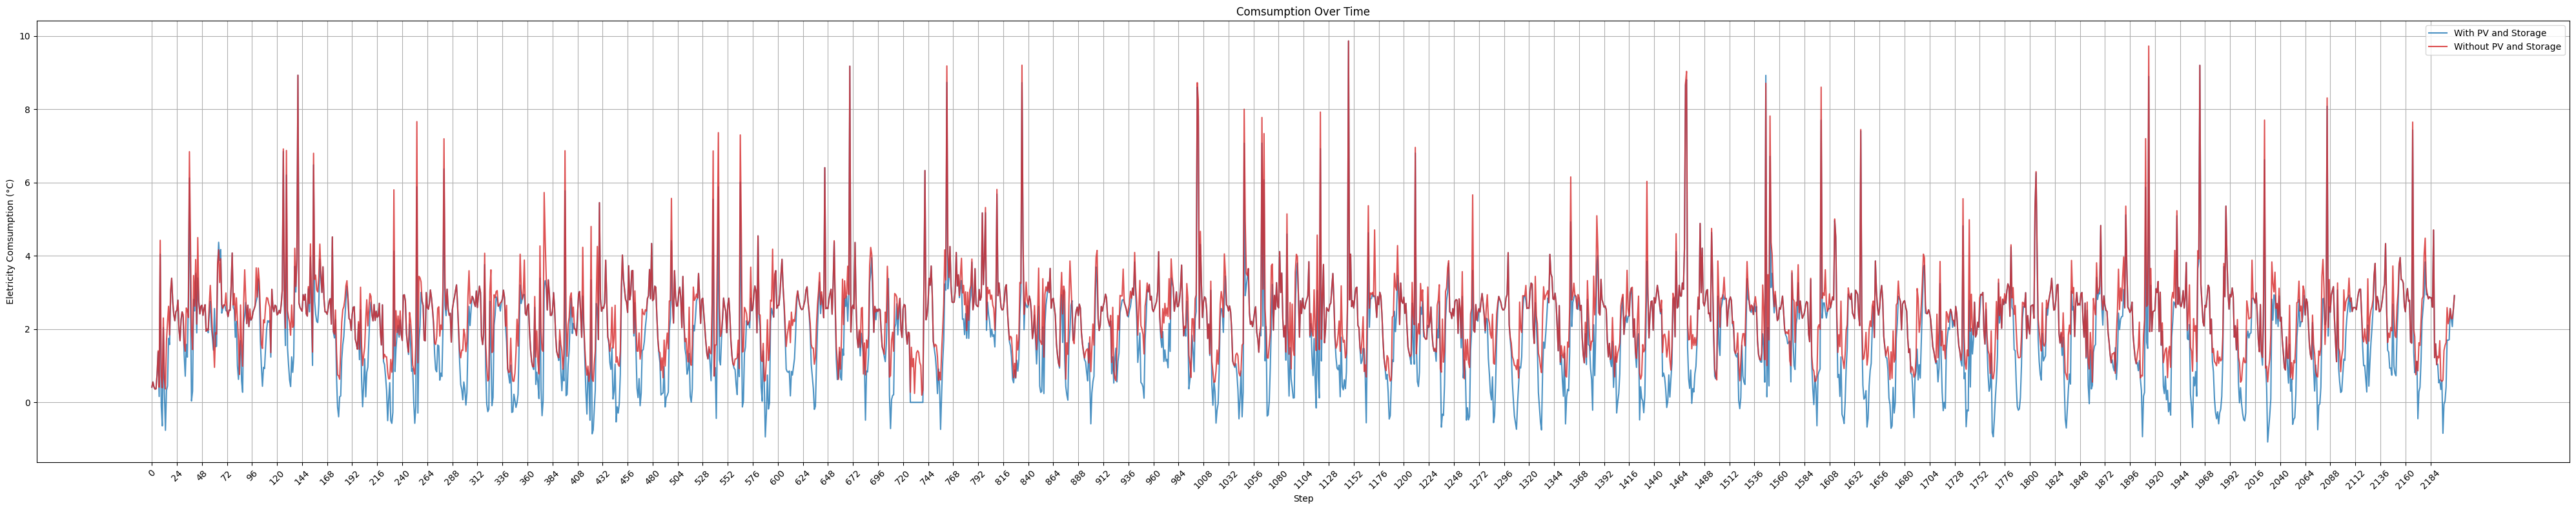

In [6]:
from utils import plotting_functions as plt

num_building = 0

#Calcola il consumo di elettricità totale dell'edificio
energy_with_pv= eval_env.buildings[num_building].net_electricity_consumption
energy_without_pv = eval_env.buildings[num_building].net_electricity_consumption_without_storage_and_pv

plt.plot_comparison_two(
    energy_with_pv,
    energy_without_pv,
    ylabel='Eletricity Comsumption (°C)',
    title='Comsumption Over Time',
    label1='With PV and Storage',
    label2='Without PV and Storage'
)

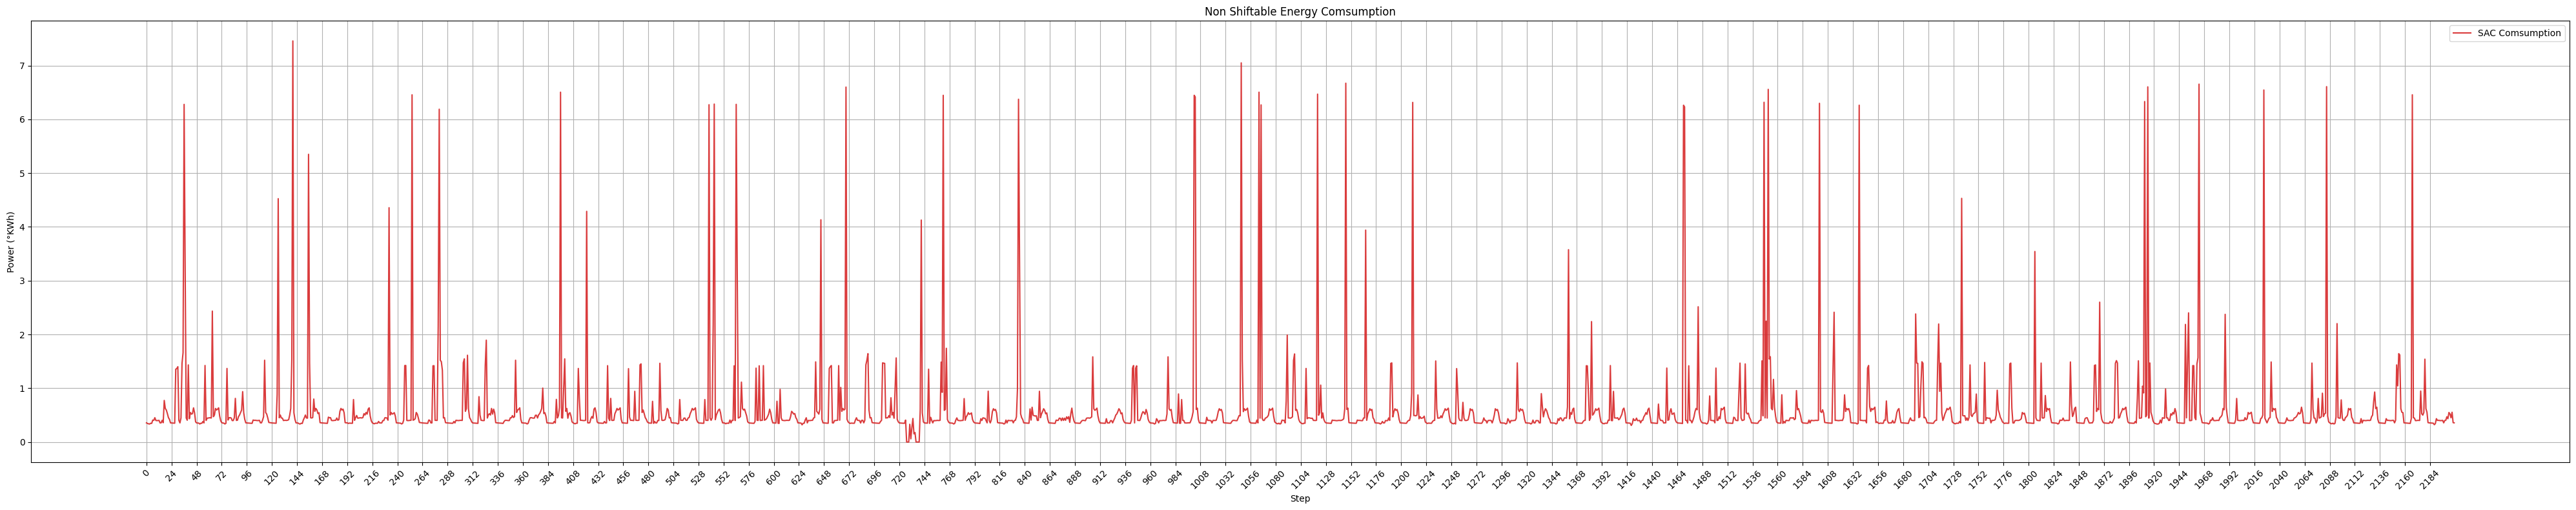

In [7]:

non_energy_sac = eval_env.buildings[num_building].non_shiftable_load_electricity_consumption

plt.plot_single_agent(
    non_energy_sac,
    ylabel='Power (°KWh)',
    title='Non Shiftable Energy Comsumption',
    label='SAC Comsumption',

)


------

## **Comportamento delle temperature**

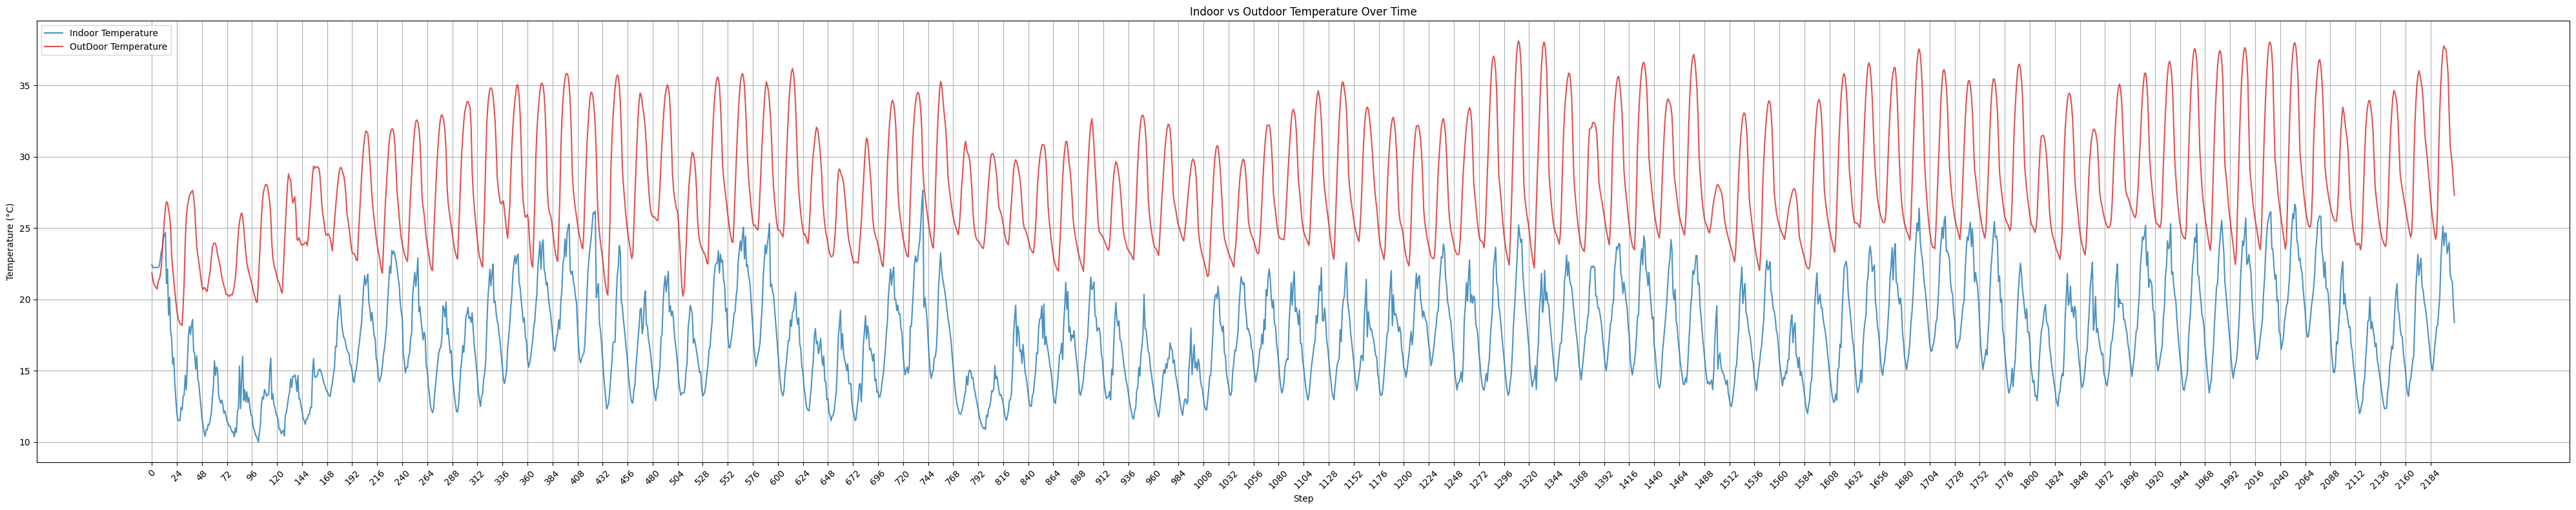

In [8]:
indoor_base_temp = eval_env.buildings[num_building].indoor_dry_bulb_temperature
outdoor_temp = eval_env.buildings[num_building].weather.outdoor_dry_bulb_temperature


plt.plot_comparison_two(
    indoor_base_temp,
    outdoor_temp,
    ylabel='Temperature (°C)',
    title='Indoor vs Outdoor Temperature Over Time',
    label1='Indoor Temperature',
    label2='OutDoor Temperature'
)


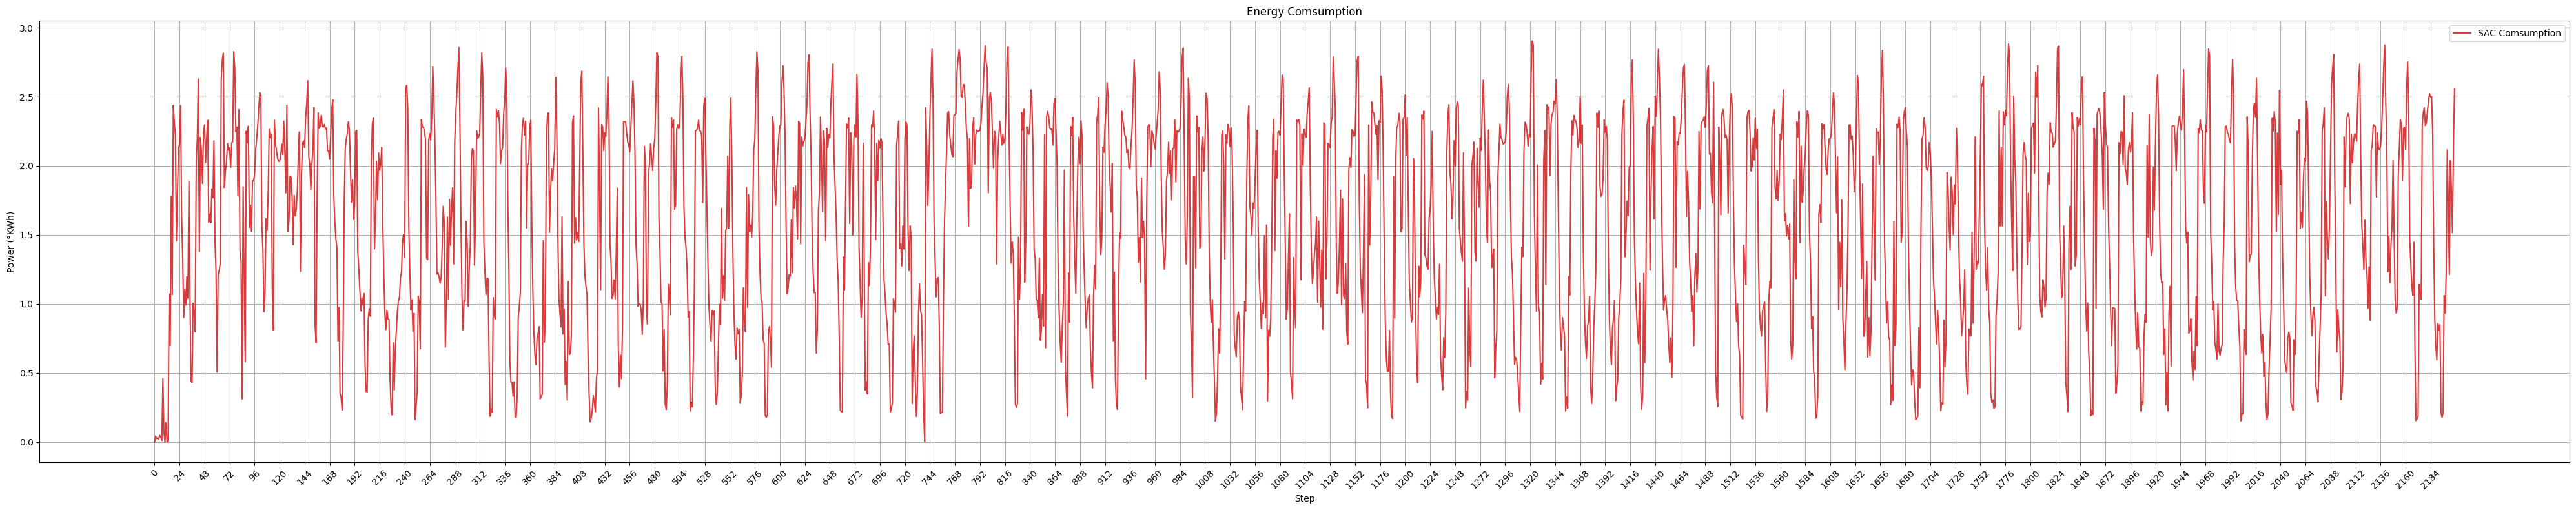

In [9]:
#Questa componente estrae la potenza utilizzata dei dispositivi che servono per regolare la temperatura ambientale

cooler_energy_sac = eval_env.buildings[num_building].cooling_electricity_consumption

plt.plot_single_agent(
    cooler_energy_sac,
    ylabel='Power (°KWh)',
    title='Energy Comsumption',
    label='SAC Comsumption',

)


----

## **Comportamento nell'utilizzo delle batterie**

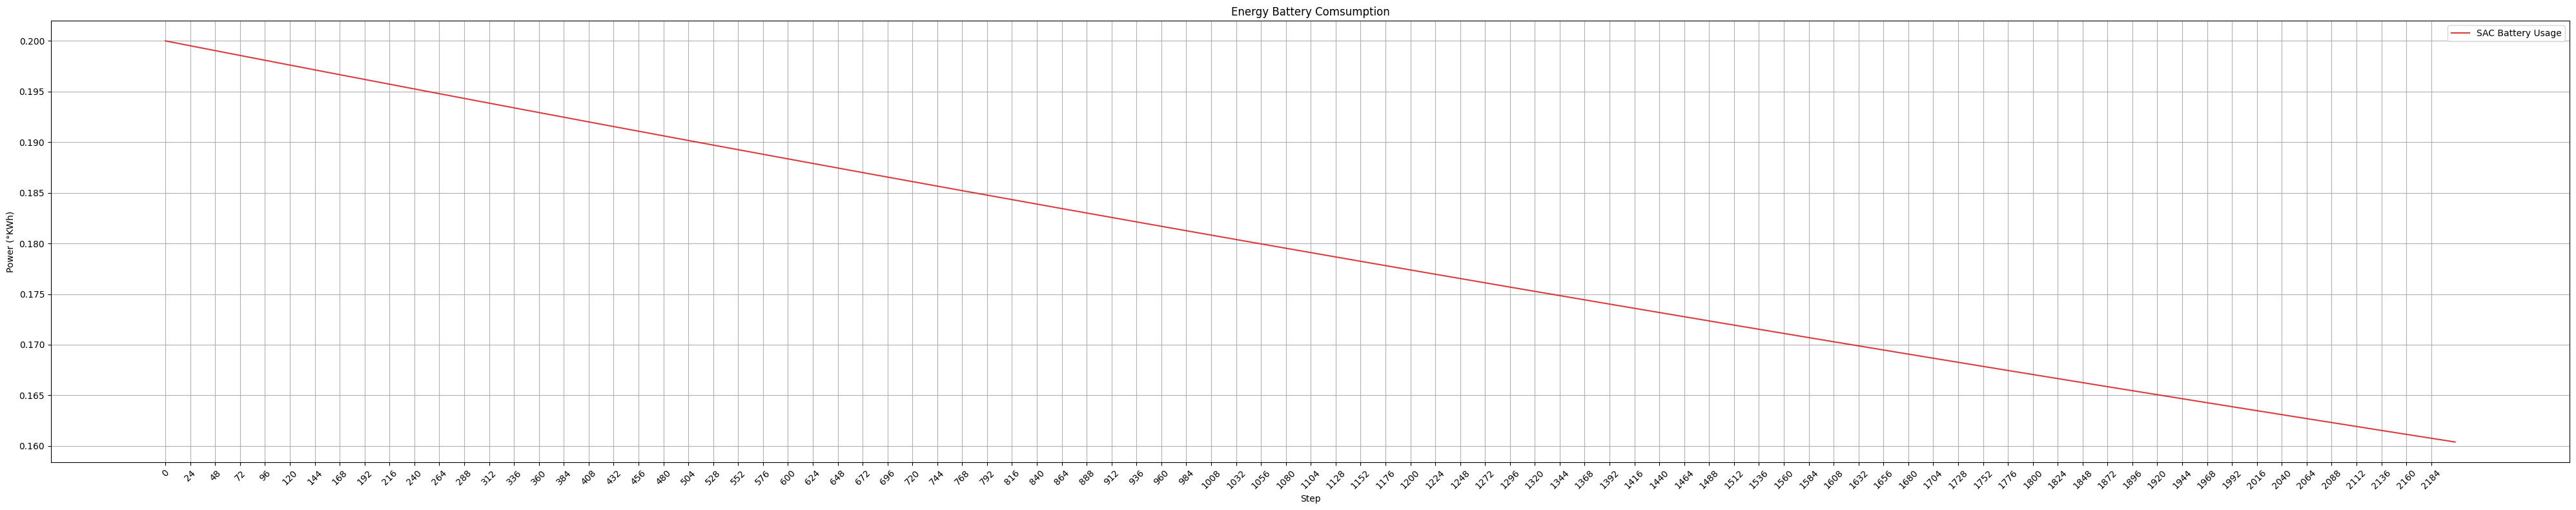

In [10]:
agent_data1 = eval_env.buildings[num_building].electrical_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='SAC Battery Usage'
)

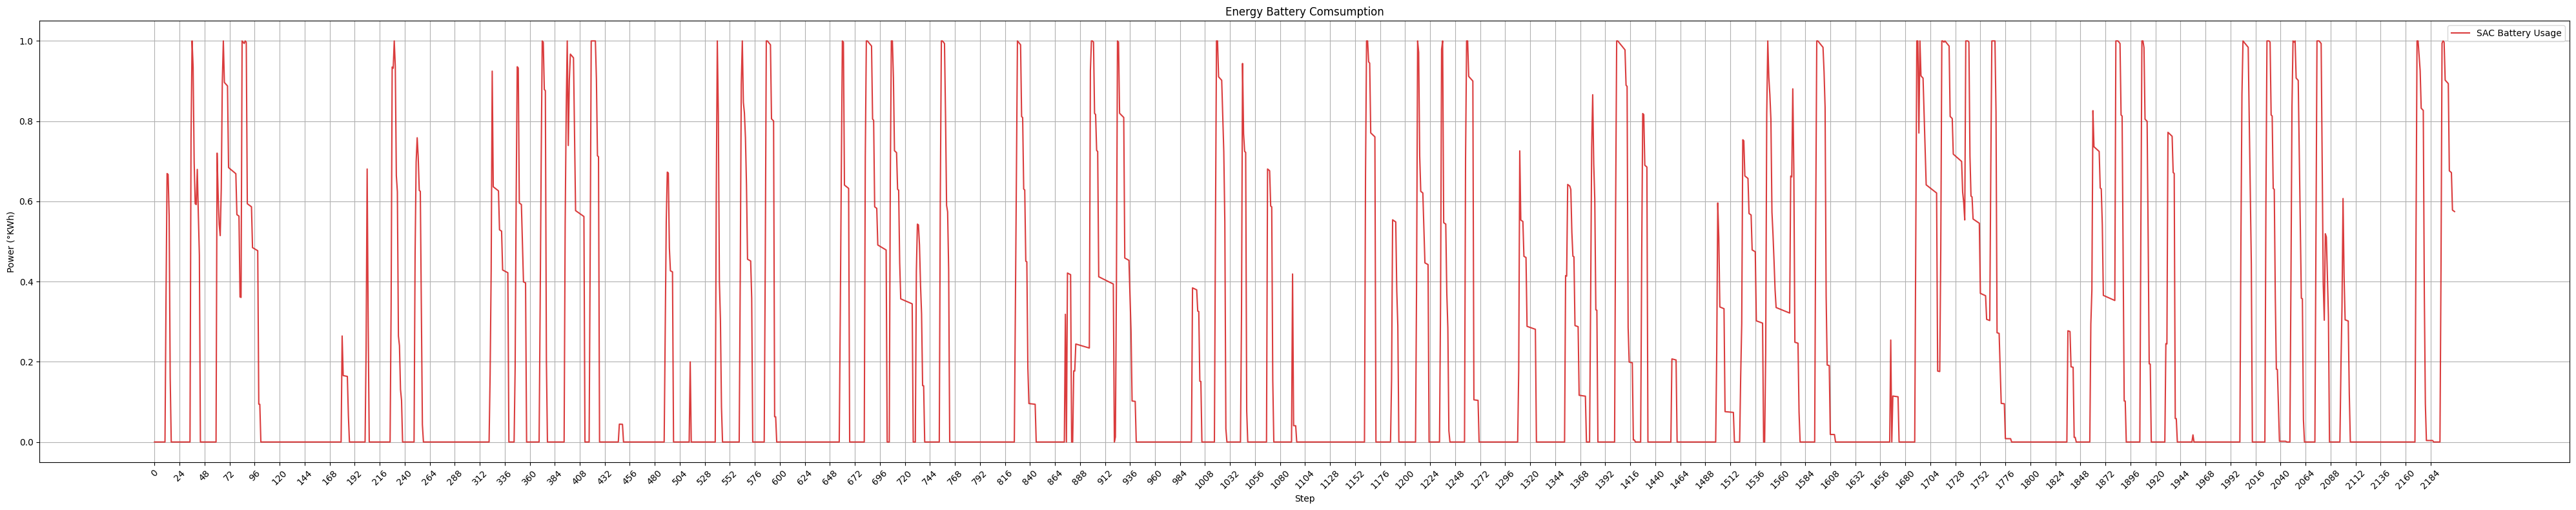

In [11]:
agent_data1 = eval_env.buildings[num_building].dhw_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='SAC Battery Usage'
)


----

## **Comportamento delle emissioni**

L'emissioni sono strettamente legate ai consumi di energia della rete, perciò le caratteristiche precedenti si propagano anche qua.

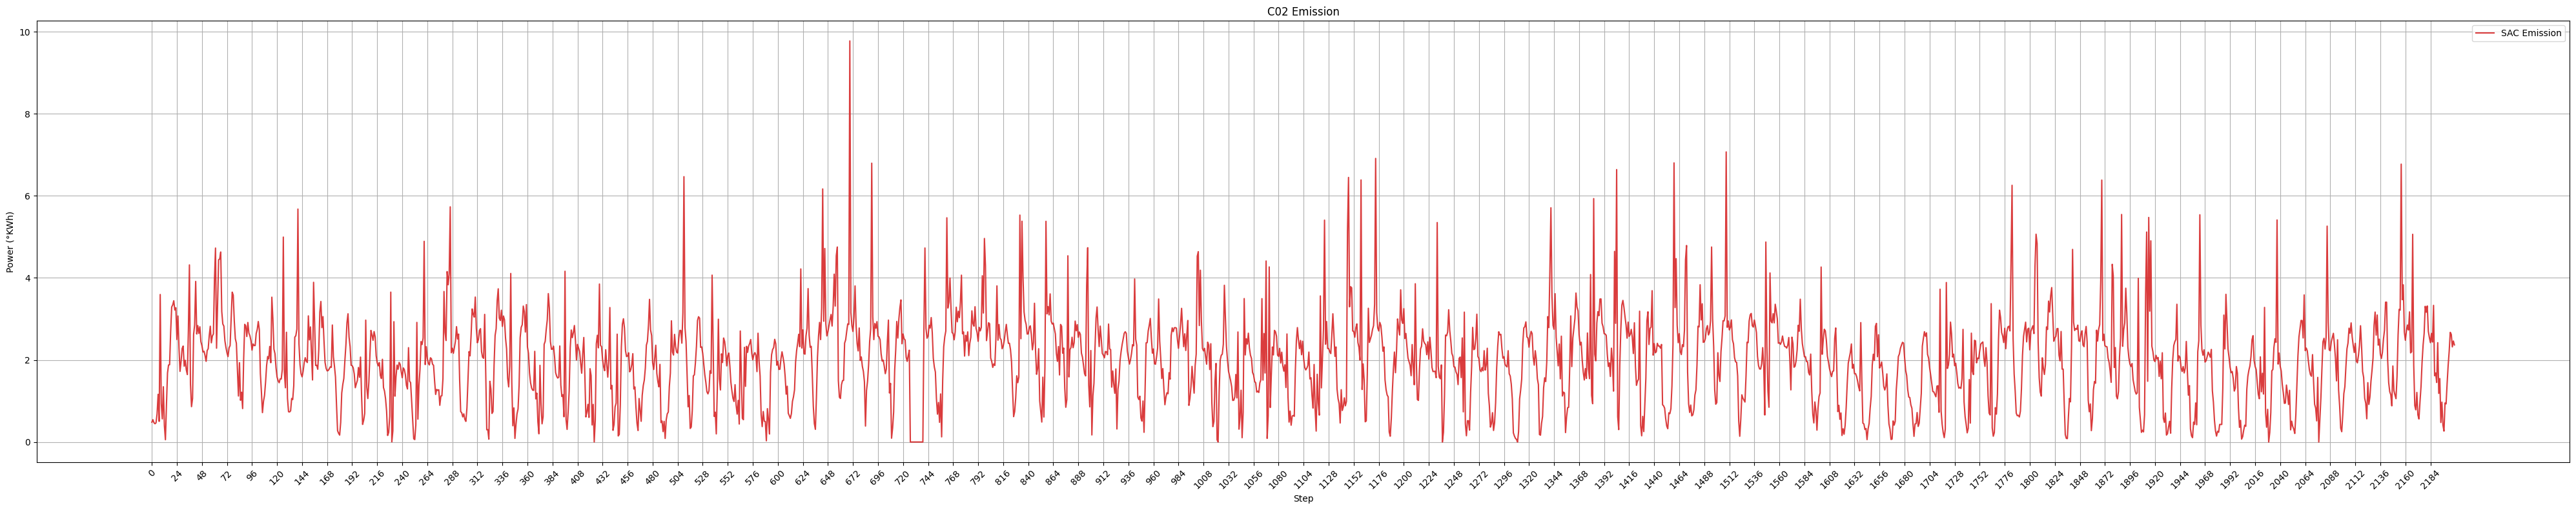

In [12]:
agent_data1 = eval_env.net_electricity_consumption_emission


plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='C02 Emission',
    label='SAC Emission'
)


----

## **Comportamento dei reward e dell'apprendimento**



Episodio  Reward Min  Reward Max   Reward Somma  Reward Media
0         1 -555.968567   -1.482833 -560421.937500   -253.929291
1         2 -426.350586   -1.755198 -296317.187500   -134.262436
2         3 -427.053650   -0.986739 -177246.218750    -80.310928
3         4 -217.521698   -1.585997 -121087.929688    -54.865395
4         5 -298.743591   -1.699493 -387197.250000   -175.440536
5         6 -251.847900   -1.755490 -151076.906250    -68.453514
6         7 -462.070984   -1.191068 -340462.406250   -154.264801

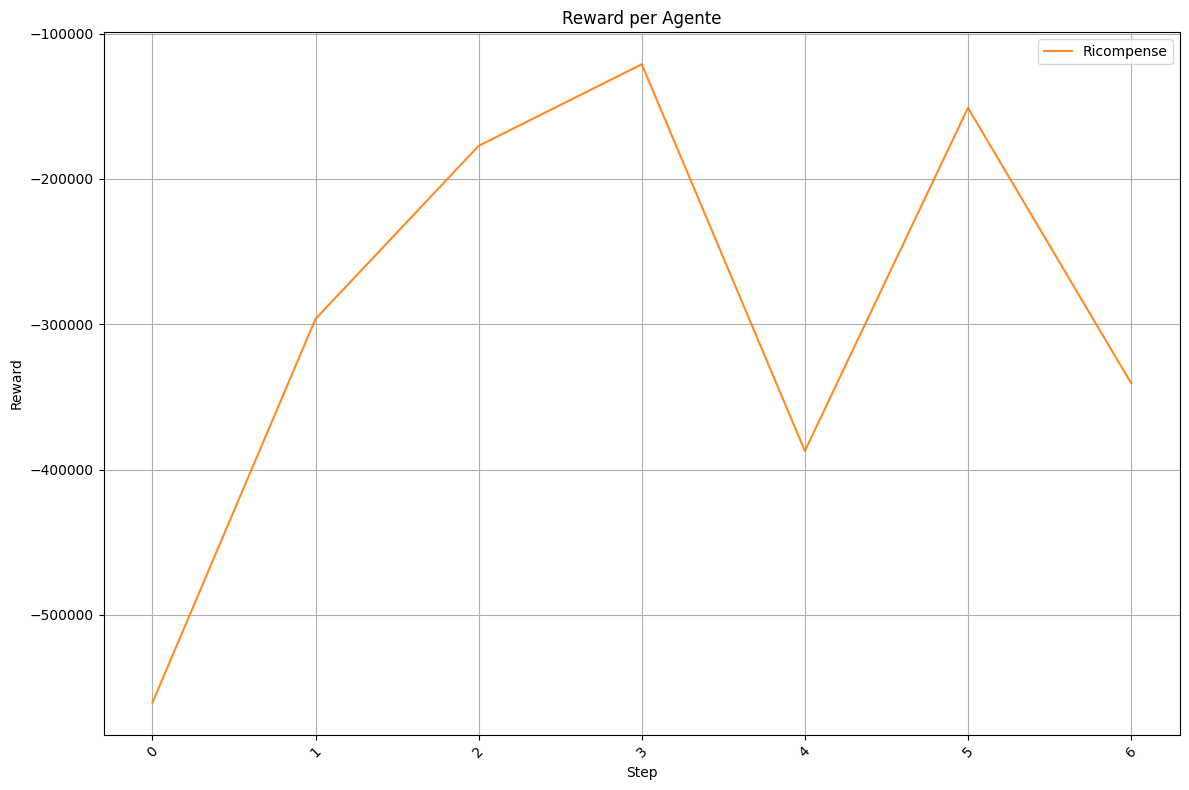

In [13]:
df = plt.create_episode_table(eval_env.episode_rewards)


display(df)

plt.plot_rewards(df['Reward Somma'])


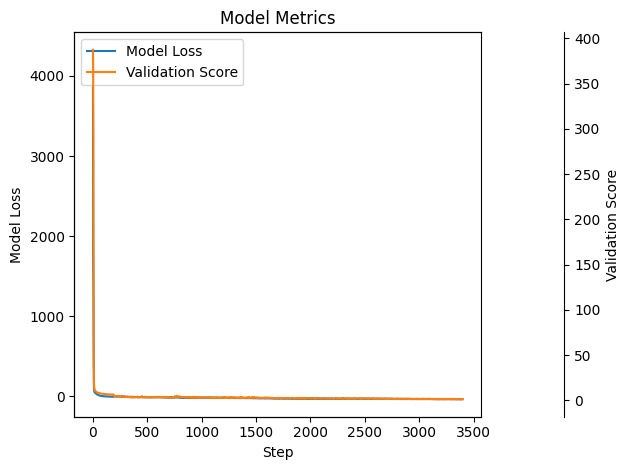

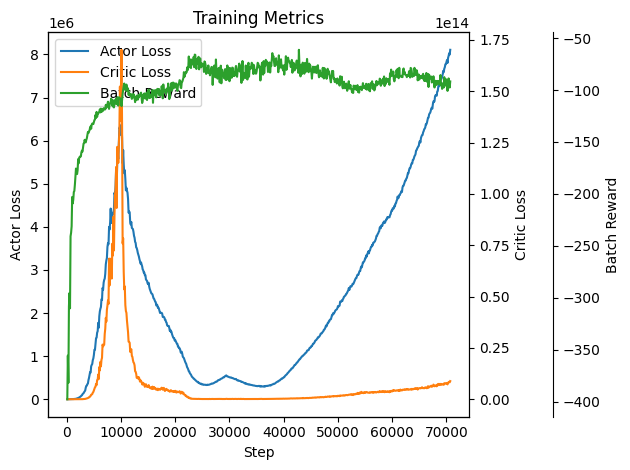

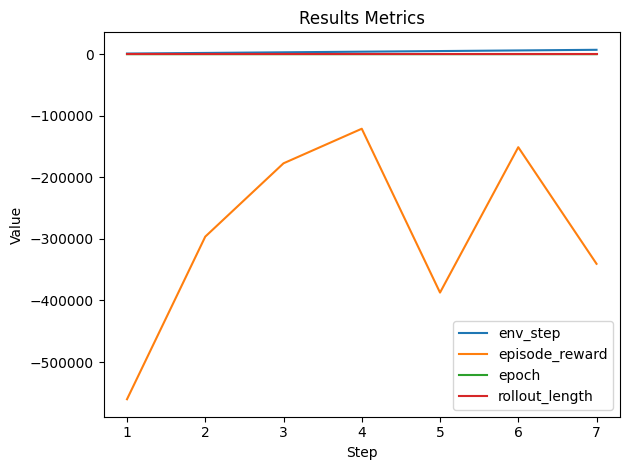

In [14]:
plt.plot_learning_metrics(os.getcwd()+"/pn_exp/m2ac")